In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
df = pd.read_csv('data/SYB66_246_202310_Population_Growth.csv', encoding='latin1', header=1)
# Dar nombre a columna 1
df = df.rename(columns={df.columns[1]:'Region'})
# Colocar el de tipo de valor correspondiente a cada columna
df['Value'] = [float(str(i).replace(",", "")) for i in df['Value']]
df['Region'] = df['Region'].astype(str)
# Excluir registros que no son paises
exclude_terms = ['Total', 'Africa', 'Asia', 'Europe', 'America', 'Oceania', 'LLDCs', 'LDC§', 'SIDS']
df = df[~df['Region'].str.contains('|'.join(exclude_terms))]

# Filtrar los datos para el año 2020 y las variables a comparar
data_2020 = df.query('Year == 2020 and (Series == "Infant mortality for both sexes (per 1,000 live births)" or Series == "Life expectancy at birth for both sexes (years)" )')

# Pivotear registros a columnas
pivot_data_2020 = data_2020.pivot(index='Region', columns=['Series'], values='Value').reset_index()

# Renombrar columnas
pivot_data_2020 = pivot_data_2020.rename(columns={
                                         pivot_data_2020.columns[0]:'Pais',
                                         pivot_data_2020.columns[1]:'Mortalidad',
                                         pivot_data_2020.columns[2]:'Expectativa'})

In [3]:
#Valores estadisticos de referencia y comparacion
pivot_data_2020.describe()

Series,Mortalidad,Expectativa
count,187.000000,187.000000
mean,20.060428,71.871123
std,18.346080,7.336829
min,1.200000,52.800000
25%,5.100000,66.750000
50%,13.100000,72.500000
75%,30.900000,77.000000
max,74.700000,84.700000


In [5]:
#Obtiene un data frame agrupado por pais y regresa un top de registros
def expectativa_pais(ascendente = True, top = None):
    return pivot_data_2020.groupby('Pais')['Expectativa'].median().sort_values(ascending = ascendente).reset_index().head(top)

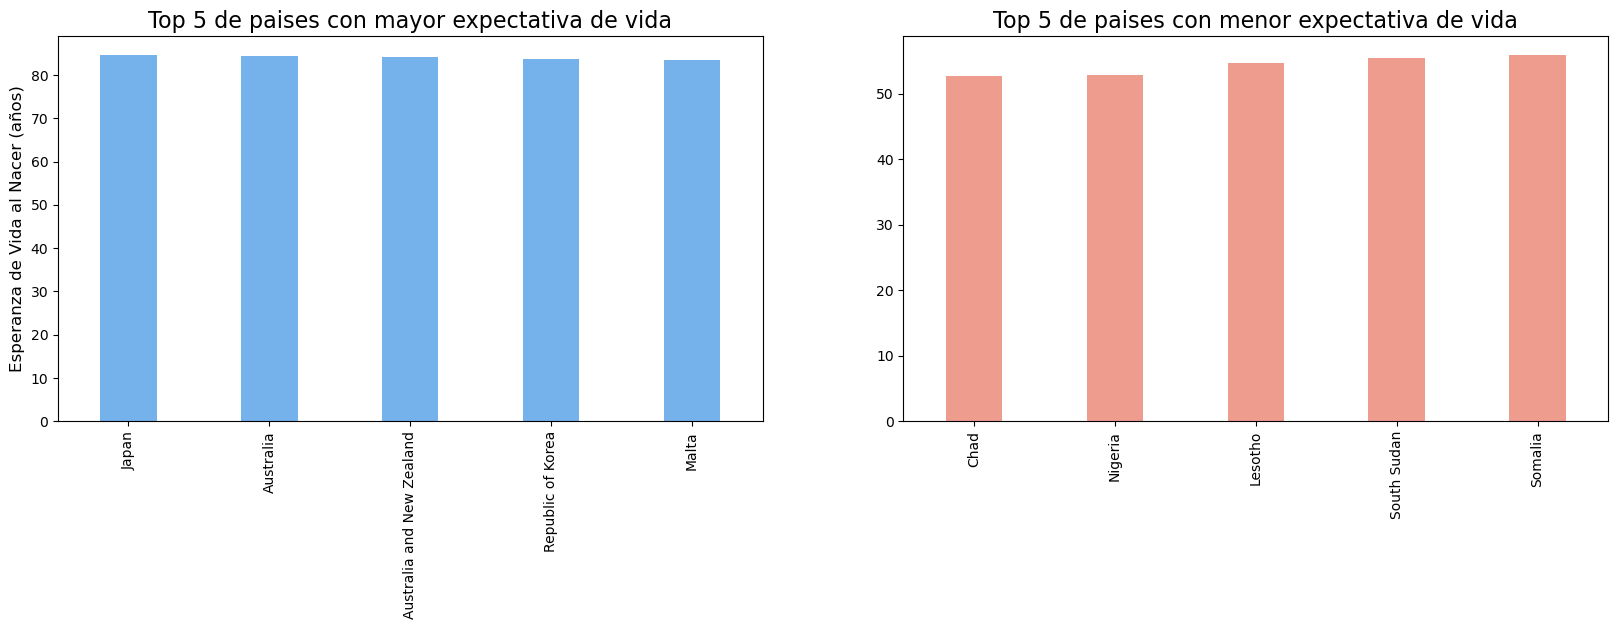

In [7]:
#Graficos barras del top 5 de paises con mayor y menor expectativa de vida respectivamente
plt.figure(figsize=(20, 5))

top_mejor_expectativa = expectativa_pais(ascendente = False, top = 5)
plt.subplot(1, 2, 1)
sns.barplot(x = 'Pais', y = 'Expectativa', data = top_mejor_expectativa, color='dodgerblue', alpha=0.7, width=0.4)
plt.xticks(rotation = 90)
plt.title('Top 5 de paises con mayor expectativa de vida', fontsize=16)
plt.ylabel('Esperanza de Vida al Nacer (años)', fontsize=12)
plt.xlabel('')

top_peor_expectativa = expectativa_pais(top = 5)
plt.subplot(1, 2, 2)
sns.barplot(x = 'Pais', y = 'Expectativa', data = top_peor_expectativa, color='tomato', alpha=0.7, width=0.4)
plt.xticks(rotation = 90)
plt.title('Top 5 de paises con menor expectativa de vida', fontsize=16)
plt.ylabel('')
plt.xlabel('')

plt.show()

In [9]:
#Grafica de barras con serie de 'Mortalidad' y 'Expectativa de vida'
def grafica_indicadores(pais):
    indicadores_pais = pivot_data_2020[pivot_data_2020['Pais'] == pais]
    fig, ax = plt.subplots(figsize=(10, 5))

    # Barras para mortalidad infantil
    ax.bar('Mortalidad', indicadores_pais['Mortalidad'].values[0], color='tomato', alpha=0.7, width=0.4)
    ax.set_ylabel('Muertes por 1,000 nacimientos', color='tomato')
    ax.tick_params(axis='y', labelcolor='tomato')
    ax.set_ylim(0, max(pivot_data_2020['Mortalidad']) * 1.1)

    # Barras para esperanza de vida (eje secundario)
    ax2 = ax.twinx()
    ax2.bar('Expectativa', indicadores_pais['Expectativa'].values[0], color='dodgerblue', alpha=0.7, width=0.4)
    ax2.set_ylabel('Años', color='dodgerblue')
    ax2.tick_params(axis='y', labelcolor='dodgerblue')
    ax2.set_ylim(0, max(pivot_data_2020['Expectativa']) * 1.1)

    plt.title(f'Indicadores de Salud: {pais}\n', fontsize=14)
    plt.tight_layout()
    plt.show()

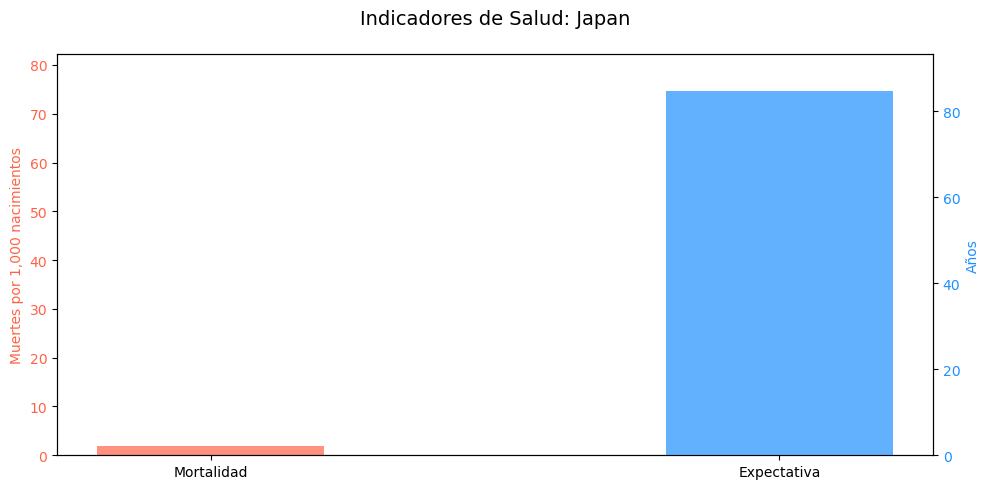

In [11]:
#Grafica del pais con mayor expectativa de vida contrastado con su indice de mortalidad
grafica_indicadores('Japan')

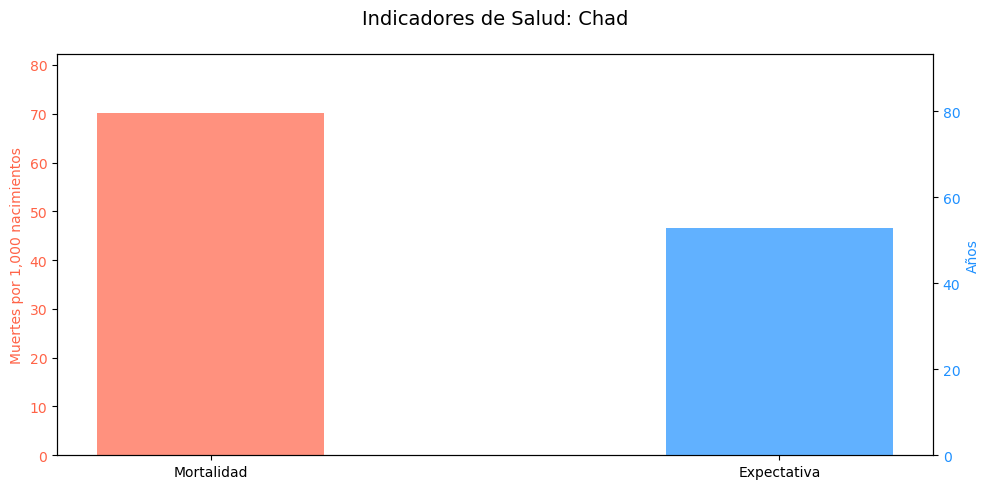

In [13]:
#Grafica del pais con menor expectativa de vida contrastado con su indice de mortalidad
grafica_indicadores('Chad')

Text(0, 0.5, 'Esperanza de Vida al Nacer (años)')

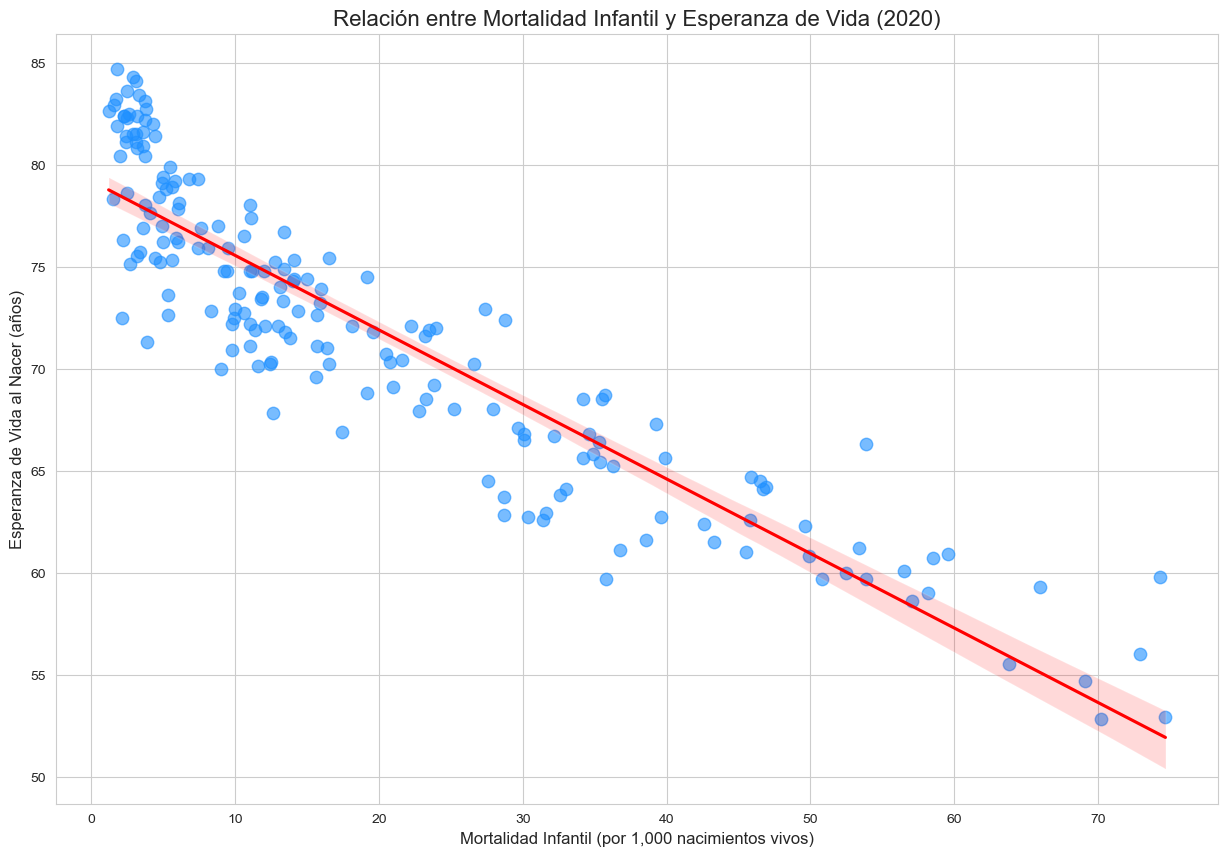

In [15]:
#Grafico de dispersion para la correlacion entre Mortalidad Infantil y Esperanza de Vida
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
scatter = sns.regplot(data=pivot_data_2020, x='Mortalidad', y='Expectativa', 
                      scatter_kws={'color':'dodgerblue', 'alpha':0.6, 's':80}, line_kws={'color':'red'})

plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida (2020)', fontsize=16)
plt.xlabel('Mortalidad Infantil (por 1,000 nacimientos vivos)', fontsize=12)
plt.ylabel('Esperanza de Vida al Nacer (años)', fontsize=12)

Text(0.5, 0, '')

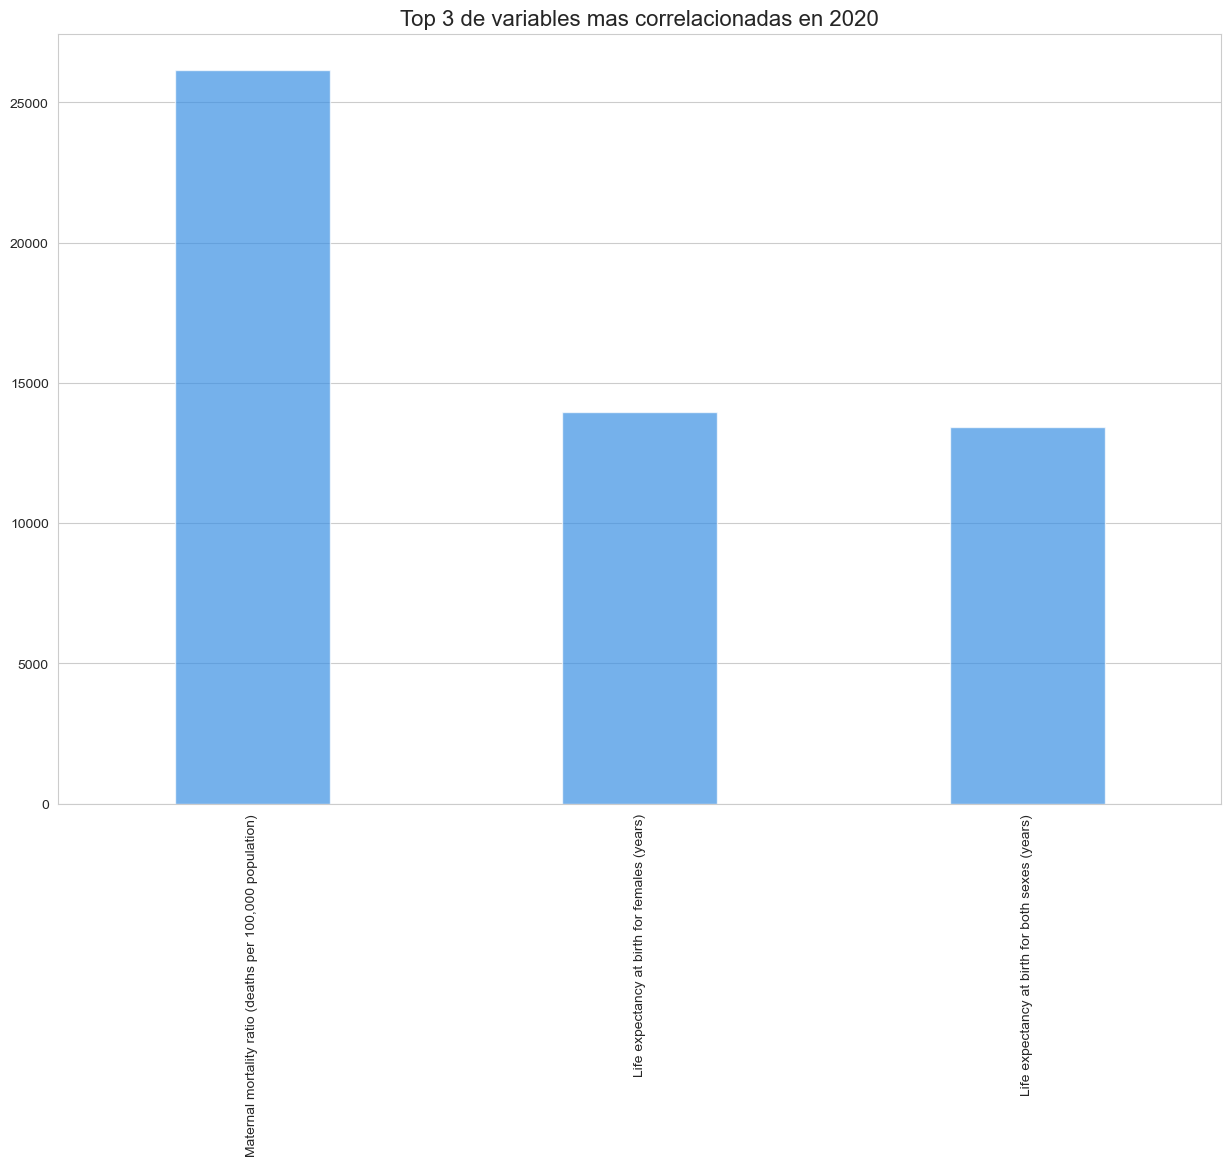

In [17]:
#Obtener las tres variables mas correlacionadas en 2020
df_variables = df.query('Year == 2020').groupby('Series').sum().sort_values(by = 'Value', ascending = False).reset_index().head(3)

plt.figure(figsize=(15, 10))
sns.barplot(x = 'Series', y = 'Value', data = df_variables, color='dodgerblue', alpha=0.7, width=0.4)
plt.xticks(rotation = 90)
plt.title('Top 3 de variables mas correlacionadas en 2020', fontsize=16)
plt.ylabel('')
plt.xlabel('')